In [2]:
# Autor: Elton Paes
# Adult Salary Prediction
# URL: https://www.kaggle.com/eltonpaes/adult-salary-prediction/notebook

# Importing libraries to play with data
import numpy as np
import pandas as pd

In [3]:
# Importing the data itself
data_set  = pd.read_csv('adult.csv')

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# No se encontraron valores nulos
data_set.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#Así que ahora es el momento de ensuciarnos las manos y tratar de descubrir qué propiedades están relacionadas 
#con el salario. Al ver la información y el encabezado de los datos, ¿tenemos alguna intuición? 
#Bueno, creo que la educación y la ocupación están fuertemente relacionadas con el salario, ¿verdad? 
#Pero, al ver los datos, tenemos un problema: los dos campos son String y Soporte de Máquinas de Vectores 
#no le gusta jugar con cuerdas. Para la Educación tenemos la columna education.num, 
#pero no tenemos nada parecido para la ocupación. Tendremos que hacer una transformación con nuestros datos

# Let's see how many unique categories we have in this property
occupation_set = set(data_set['occupation'])
print(occupation_set)


{'Tech-support', 'Handlers-cleaners', 'Priv-house-serv', 'Machine-op-inspct', 'Armed-Forces', 'Craft-repair', 'Adm-clerical', 'Transport-moving', 'Farming-fishing', 'Exec-managerial', '?', 'Protective-serv', 'Sales', 'Prof-specialty', 'Other-service'}


In [7]:
# Now we classify them as numers instead of their names.
data_set['occupation'] = data_set['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [8]:
# Just print it to see if nothing gone wrong
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,0,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,7,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,0,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,6,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,5,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
#Genial, tenemos las clases de ocupación en números. Ahora, usemos esta oportunidad para transformar 
#la columna de ingresos (income) también y hagamos lo mismo que hicimos con la ocupación.

# Again, let's see how many unique categories we have in this property
income_set = set(data_set['income'])
print(income_set)

{'>50K', '<=50K'}


In [10]:
# As expected. Just transforming now.
data_set['income'] = data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [11]:
# Just print it to see if nothing gone wrong
data_set.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,0,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,7,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,0,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,6,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,5,Own-child,White,Female,0,3900,40,United-States,0


In [12]:
# Bien, ahora tenemos todo listo para probar nuestra teoría.

# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

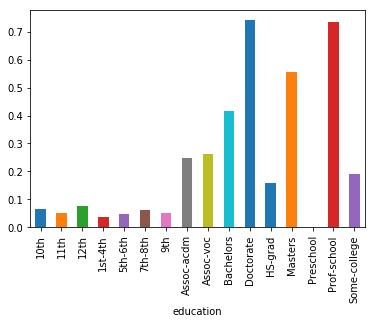

In [13]:
data_set.groupby('education').income.mean().plot(kind='bar')

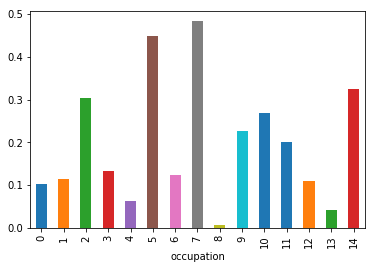

In [14]:
data_set.groupby('occupation').income.mean().plot(kind='bar')

In [16]:
#Bueno, apretón de limón fácil de peasy. Tal como se esperaba, cuanto mayor sea la educación y cuanto más alto 
#sea el título del trabajo, mayor será el ingreso. Veamos si eso es suficiente para lograr nuestro objetivo

# Separamos nuestra data
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = data_set[['education.num', 'occupation']]

# Taking the labels (Income)
Y = data_set['income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
# Utilizamos SVM para realizar la predicción 

# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7871948410870566


In [18]:
#No presumamos más, escuchemos nuestros datos. ¿Qué está tratando de decirnos? Para responder, 
#usaré mapas de correlación y veré qué características están correlacionadas entre sí, 
#pero antes de eso, ¡más transformaciones!

# Transforming the Sex into 0 and 1
data_set['sex'] = data_set['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [19]:
# How many unique races we got here?
race_set = set(data_set['race'])
print(race_set)

{'White', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Other', 'Black'}


In [21]:
data_set['race'] = data_set['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [22]:
# What about maritial status?
mstatus_set = set(data_set['marital.status'])
print(mstatus_set)

{'Widowed', 'Married-civ-spouse', 'Married-AF-spouse', 'Divorced', 'Never-married', 'Separated', 'Married-spouse-absent'}


In [23]:
data_set['marital.status'] = data_set['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [24]:
# Everythin' good?
data_set.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,1,0,Not-in-family,3,1,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,1,7,Not-in-family,3,1,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,1,0,Unmarried,0,1,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,4,6,Unmarried,3,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,3,5,Own-child,3,1,0,3900,40,United-States,0


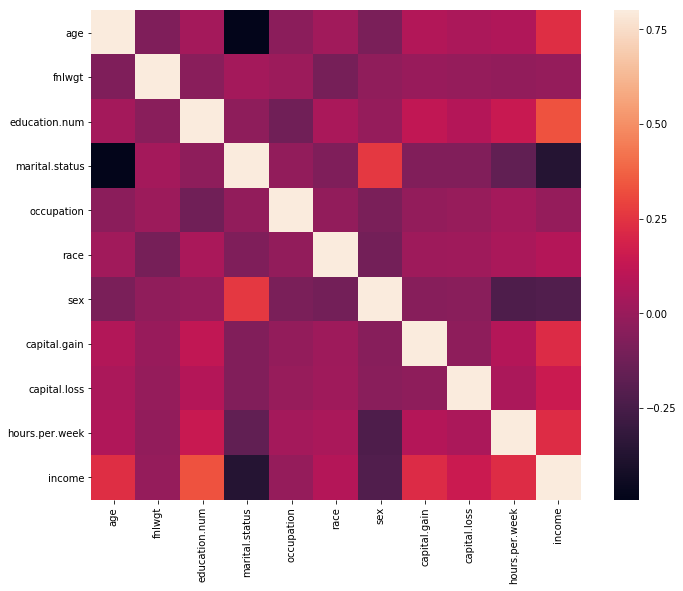

In [25]:
#Ahora que tenemos más datos, hagamos el mapa de correlación y veamos qué nos dice

import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

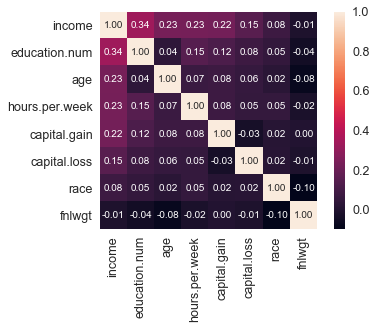

In [26]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [27]:
# Entonces, el primer gráfico nos muestra la relación entre cada par de valores numéricos. Cuanto más caliente es 
# el cuadrado, más fuerte es la relación entre ellos. El segundo, nos muestra las 7 características más relacionadas
# con los ingresos con el factor de relación ordenado por este factor. Podemos ver en el primer gráfico, 
# por ejemplo, que el estado civil tiene una fuerte relación con el sexo, pero realmente débil con la edad. 
# También podemos ver que las clasificaciones que hicimos (raza, estado civil, ocupación) tienen muy poca influencia 
# en los ingresos. Eso es porque es solo clasificación, no valores lineales. Pero estos gráficos nos muestran que 
# la edad, las horas por semana y la ganancia de capital tienen cierta influencia en el ingreso, 
# ¡probemos eso! Comenzaremos por cambiar la ocupación por edad en nuestra última predicción.

# Taking only the features that is important for now
X = data_set[['education.num', 'age']]

# Taking the labels (Income)
Y = data_set['income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7885766927683096


In [29]:
# 0.1% mejor ... Veamos las tres características que el gráfico nos muestra

# Taking only the features that is important for now
X = data_set[['education.num', 'age', 'hours.per.week', 'capital.gain']]

# Taking the labels (Income)
Y = data_set['income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.8023952095808383


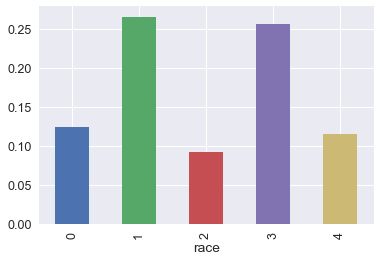

In [31]:
# ¡Y lo logramos: 80.2%! ¡Bonito! Simplemente escuchando nuestros datos podríamos superar nuestra intuición y 
# lograr nuestro objetivo. ¿Pero se ha ido tu curiosidad? ¿Qué raza tiene los mayores ingresos? 
# ¿Las mujeres ganan menos dinero que los hombres? ¿Y a qué edad tenemos más oportunidades de ganar más? Vamos a 
# ver

data_set.groupby('race').income.mean().plot(kind='bar')

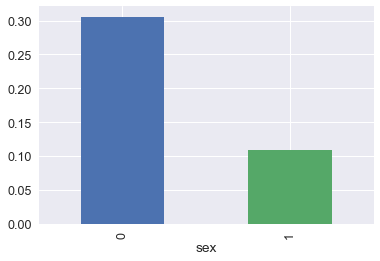

In [32]:
data_set.groupby('sex').income.mean().plot(kind='bar')

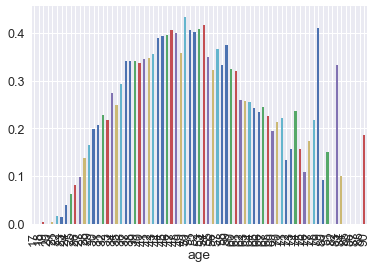

In [33]:
# Mean below 20 years old
data_set.groupby('age').income.mean().plot(kind='bar')

In [ ]:
Conclusión

Logramos nuestro objetivo al ver los datos más cerca, tratando de entender sus realidades entre las características. Después de eso, exploramos los datos un poco más y aprendimos que:

    Los hombres tienen más oportunidades de tener un ingreso más alto
    Los blancos y asiáticos de las islas del Pacífico tienen más oportunidades que otras razas
    El ingreso sigue la desviación normal, con un pico a los 50 años de edad

¡Espero que hayas disfrutado!

In [34]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32